# Phase - II Final project
# Singana Pramod ,  Thubati Surya Sai Prakash
# CH.EN.U4ECE21047 , CH.EN.U4ECE21059

In [6]:
### https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/#google_vignette

## Project Title: Advanced Fake News Detection on Digital Platforms Using Deep Learning and NLP Techniques
## Project Description:
#### The aim of this project is to develop a deep learning model capable of accurately classifying news articles as fake or genuine. This model used natural language processing (NLP) techniques to preprocess and analyze the text data, transforming it into a format suitable for training a neural network. The project involves several key steps, including data cleaning, text vectorization, model building, and evaluation.

### Importing necessary libraries

In [1]:
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding

In [4]:
!pip install wordcloud

In [3]:
import pandas as pd
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import seaborn as sns

## To read the news.csv file

In [4]:
data=pd.read_csv(r"C:\Users\tsaiv\OneDrive\Documents\news.csv")

In [5]:
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [6]:


# Rename the "Unnamed: 0" column to "id" if it exists
if 'Unnamed: 0' in data.columns:
    data = data.rename(columns={'Unnamed: 0': 'id'})


### This function prints the shape, data types, head, tail, and number of missing values in a given DataFrame.

In [7]:
def check_df(dataframe,head=5):
    print("Shape: ")
    print(dataframe.shape)
    print("Types:  ")
    print(dataframe.dtypes)
    print("Head: ")
    print(dataframe.head(head))
    print("Tail: ")
    print(dataframe.dtypes)
    print("NA ")
    print(dataframe.isnull().sum())

In [8]:
check_df(data)

Shape: 
(6335, 4)
Types:  
id        int64
title    object
text     object
label    object
dtype: object
Head: 
      id                                              title  \
0   8476                       You Can Smell Hillary’s Fear   
1  10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2   3608        Kerry to go to Paris in gesture of sympathy   
3  10142  Bernie supporters on Twitter erupt in anger ag...   
4    875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
Tail: 
id        int64
title    object
text     object
label    object
dtype: object
NA 
id       0
title    0
text     0
label    0
dtype: int

In [10]:
news_count = data['label'].value_counts()
news_count

REAL    3171
FAKE    3164
Name: label, dtype: int64

### This code calculates and visualizes the distribution of text lengths and label counts in the dataset, creating both individual and combined plots.


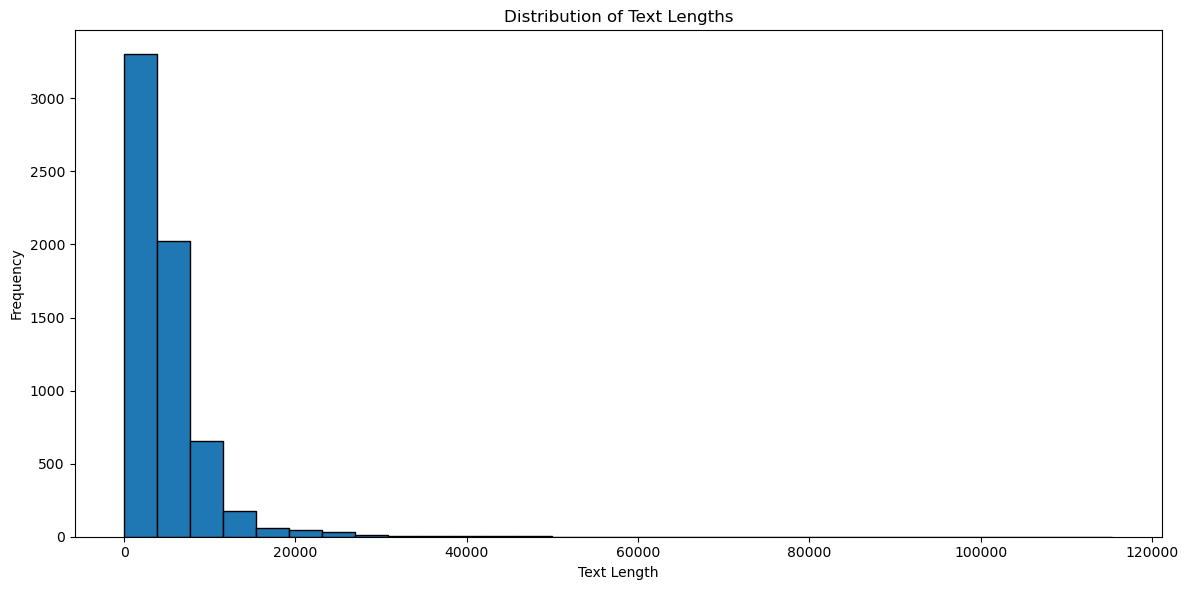

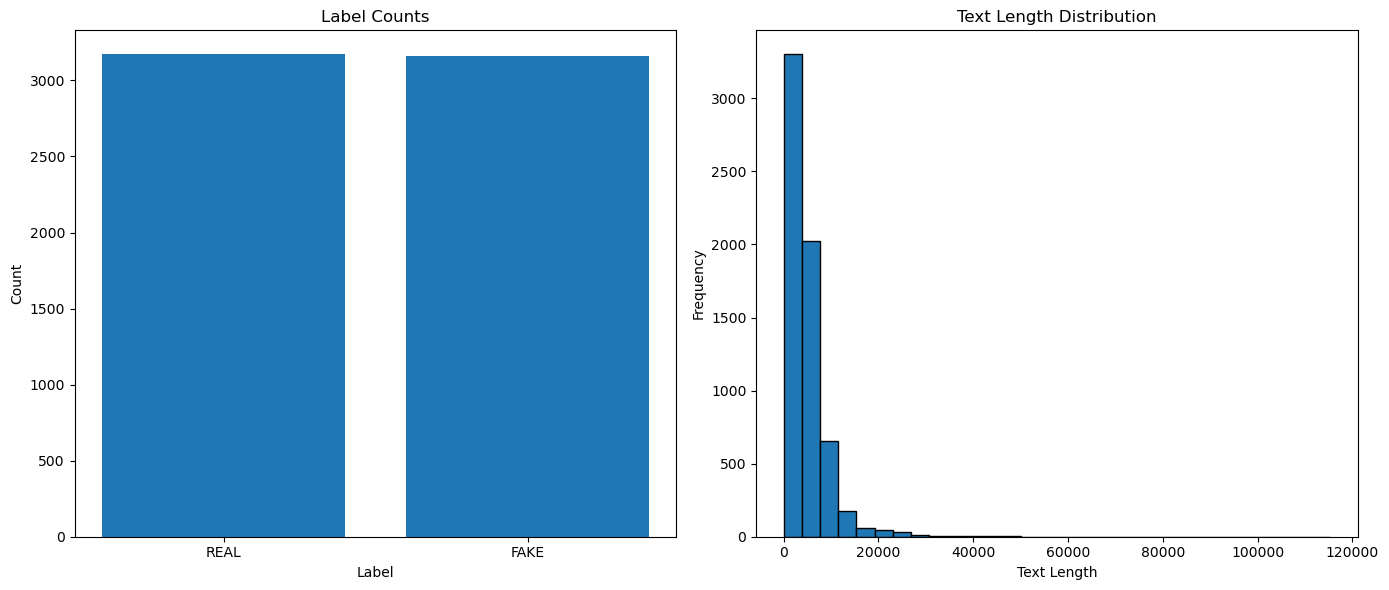

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = data['label'].value_counts()

# Create a new variable for the length of the text in each article
data['text_length'] = data['text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(12, 6))
plt.hist(data['text_length'], bins=30, edgecolor='k')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Create subplots for label counts and text length distribution
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for label counts
axs[0].bar(label_counts.index, label_counts.values)
axs[0].set_title('Label Counts')
axs[0].set_xlabel('Label')
axs[0].set_ylabel('Count')

# Histogram for text length distribution
axs[1].hist(data['text_length'], bins=30, edgecolor='k')
axs[1].set_title('Text Length Distribution')
axs[1].set_xlabel('Text Length')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()



### This code generates a count plot to visualize the distribution of 'FAKE' and 'REAL' news labels in the dataset.

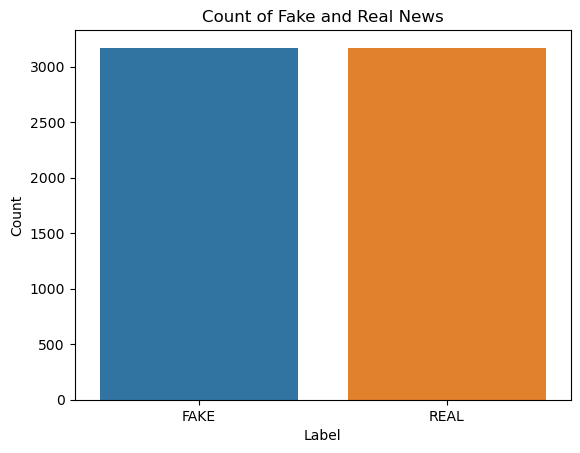

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot for the 'label' column
sns.countplot(x='label', data=data, order=['FAKE', 'REAL'])
plt.title('Count of Fake and Real News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


### This code creates a count plot of 'FAKE' and 'REAL' news labels, segmented by label and text length, using the catplot function for enhanced visualization.

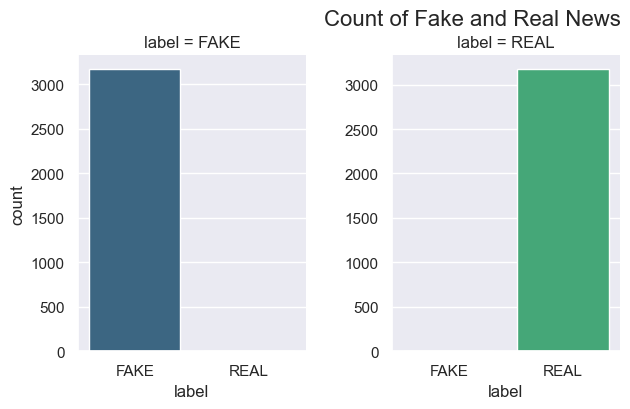

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is news_df

# Set the order of sentiment categories for 'label'
label_order = ['FAKE', 'REAL']

# Adjust the aspect ratio for better aesthetics
sns.set(rc={'figure.figsize': (15, 8)})

# Use the newer 'catplot' to create a count plot for 'label' with 'text_length' as a categorical variable
sns.catplot(x='label', data=data,
            order=label_order, kind='count',
            col='label', col_wrap=3,
            height=4, aspect=0.8,
            sharex=False, sharey=False, palette='viridis')

# Set additional plot attributes if needed
plt.suptitle('Count of Fake and Real News', y=1.02, fontsize=16)
plt.show()


### This code generates a box plot to visualize the distribution of text lengths for 'FAKE' and 'REAL' news labels

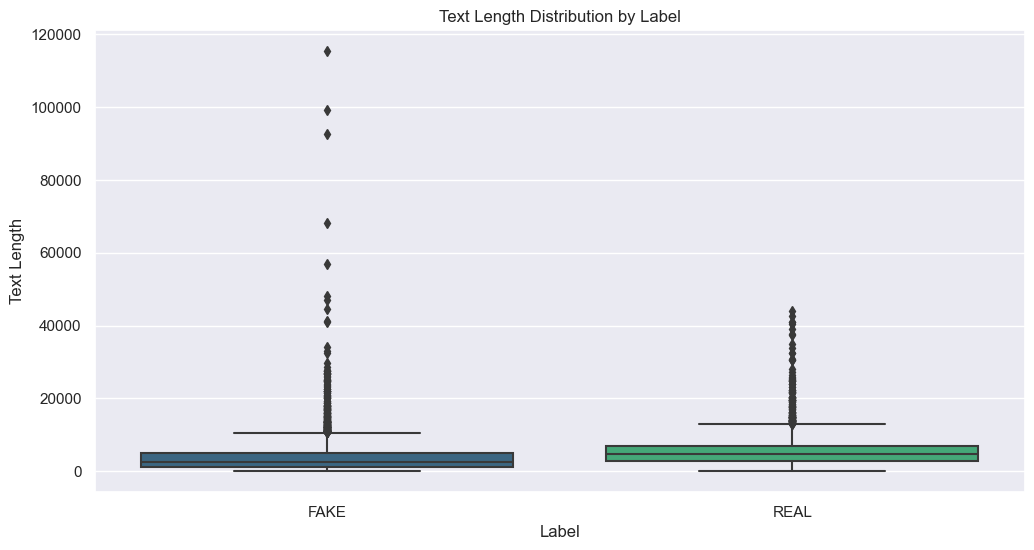

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Adjust the aspect ratio for better aesthetics
sns.set(rc={'figure.figsize': (12, 6)})

# Create a box plot to show the distribution of text lengths by label
sns.boxplot(x='label', y='text_length', data=data, palette='viridis')

# Set plot attributes
plt.title('Text Length Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()


## Word Cloud
### This code generates and displays a word cloud from the combined text of all news articles, excluding common English stopwords.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


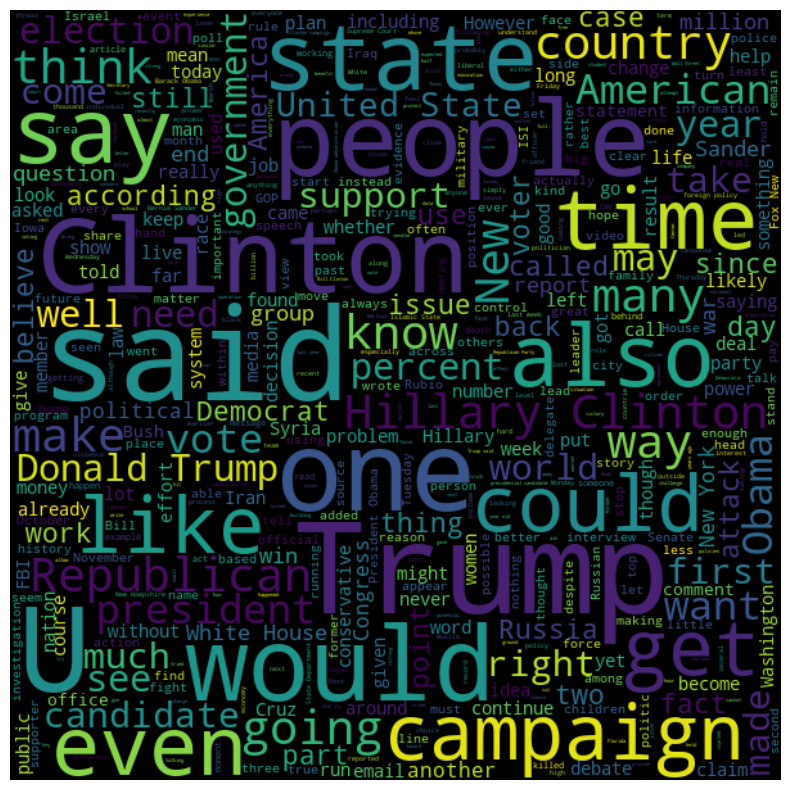

In [15]:
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure nltk stopwords are downloaded
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

# Combine all text data into one string
reviews = " ".join(data.text)

# Create and generate a word cloud image
plt.figure(figsize=(20,10))
wordcloud = WordCloud(height=600, width=600, max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [16]:
data.columns

Index(['Unnamed: 0', 'title', 'text', 'label', 'text_length'], dtype='object')

In [17]:
# Calculate the counts for each label in the dataset
label_counts = data['label'].value_counts()
label_counts


REAL    3171
FAKE    3164
Name: label, dtype: int64

### This code calculates sentiment scores (negative, neutral, positive, and compound) for the top 10 most frequent labels in the news dataset using the VADER SentimentIntensityAnalyzer.


In [20]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download vader lexicon if not already downloaded
nltk.download('vader_lexicon')

# Assuming news_df is our dataset
df_news = data.copy()

# Grouping and counting labels
df_news_lines = df_news.groupby('label').count()
df_news_lines = df_news_lines.sort_values(by=['text_length'], ascending=False)[:10]
top_labels = df_news_lines.index.values

# Filtering out non-top labels
df_sentiment_analysis = df_news[df_news['label'].isin(top_labels)]
df_sentiment_analysis = df_sentiment_analysis[['label', 'text']]

# Initializing the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Calculating sentiment scores
df_sentiment_analysis.reset_index(inplace=True, drop=True)
df_sentiment_analysis[['neg', 'neu', 'pos', 'compound']] = df_sentiment_analysis['text'].apply(lambda x: sid.polarity_scores(x)).apply(pd.Series)

df_sentiment_analysis.head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,label,text,neg,neu,pos,compound
0,FAKE,"Daniel Greenfield, a Shillman Journalism Fello...",0.181,0.732,0.087,-0.9994
1,FAKE,Google Pinterest Digg Linkedin Reddit Stumbleu...,0.075,0.836,0.089,0.7723
2,REAL,U.S. Secretary of State John F. Kerry said Mon...,0.054,0.852,0.094,0.9595
3,FAKE,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0.085,0.835,0.081,-0.4242
4,REAL,It's primary day in New York and front-runners...,0.082,0.743,0.175,0.9903


### This code prints the DataFrame information and the first few rows after performing sentiment analysis on the news articles.

In [22]:

# Print information after sentiment analysis
print("DataFrame Info after Sentiment Analysis:")
print(df_sentiment_analysis.info())
print("DataFrame Head after Sentiment Analysis:")
print(df_sentiment_analysis.head())


DataFrame Info after Sentiment Analysis:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   label     6335 non-null   object 
 1   text      6335 non-null   object 
 2   neg       6335 non-null   float64
 3   neu       6335 non-null   float64
 4   pos       6335 non-null   float64
 5   compound  6335 non-null   float64
dtypes: float64(4), object(2)
memory usage: 297.1+ KB
None
DataFrame Head after Sentiment Analysis:
  label                                               text    neg    neu  \
0  FAKE  Daniel Greenfield, a Shillman Journalism Fello...  0.181  0.732   
1  FAKE  Google Pinterest Digg Linkedin Reddit Stumbleu...  0.075  0.836   
2  REAL  U.S. Secretary of State John F. Kerry said Mon...  0.054  0.852   
3  FAKE  — Kaydee King (@KaydeeKing) November 9, 2016 T...  0.085  0.835   
4  REAL  It's primary day in New York and front-runners...  0

In [ ]:
!python -m spacy download en_core_web_sm


### This code applies Named Entity Recognition (NER) using SpaCy to extract and store named entities from the text column in the news dataset, and prints the named entities for the first few documents.


In [30]:
import spacy
import pandas as pd

# Load English language model
nlp = spacy.load("en_core_web_sm")

# Assuming news_df is our dataset
df_news = data.copy()

# Choose the column containing text data for Named Entity Recognition
text_column = 'text'

# Apply NER to the text in the specified column
df_news['entities'] = df_news[text_column].apply(lambda x: [(ent.text, ent.label_) for ent in nlp(x).ents])

# Print named entities from the first few documents
for index, row in df_news.head().iterrows():
    entities = row['entities']
    print(f"Document {index + 1}: {entities}")


Document 1: [('Daniel Greenfield', 'PERSON'), ('Shillman Journalism Fellow', 'PERSON'), ('the Freedom Center', 'FAC'), ('New York', 'GPE'), ('Islam', 'ORG'), ('Hillary Rodham Clinton', 'PERSON'), ('FBI', 'ORG'), ('FBI', 'ORG'), ('Hillary', 'PERSON'), ('an hour', 'TIME'), ('CNN', 'ORG'), ('FBI', 'ORG'), ('James Comey', 'PERSON'), ('Hillary', 'PERSON'), ('FBI', 'ORG'), ('Obama', 'GPE'), ('CNN', 'ORG'), ('Hillary', 'PERSON'), ('Comey', 'PERSON'), ('Clintons', 'PERSON'), ('FBI', 'ORG'), ('FBI', 'ORG'), ('Hillary', 'PERSON'), ('FBI', 'ORG'), ('Democrats', 'NORP'), ('the Clinton Foundation', 'ORG'), ('Hillary Clinton', 'PERSON'), ('FBI', 'ORG'), ('Obama’s DOJ', 'ORG'), ('The New York Times', 'ORG'), ('Comey', 'PERSON'), ('J. Edgar Hoover', 'PERSON'), ('James Comey Role', 'PERSON'), ('FBI', 'ORG'), ('The Boston Globe', 'ORG'), ('Comey', 'PERSON'), ('Time', 'ORG'), ('James Carville', 'PERSON'), ('MSNBC', 'ORG'), ('Comey', 'PERSON'), ('House', 'ORG'), ('Republicans', 'NORP'), ('KGB', 'ORG'), ('

## Stemming

In [31]:
import pandas as pd
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load English stop words
stop_words = set(stopwords.words('english'))

# Instantiate WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Assuming news_df is our dataset
df_news = data.copy()

# Choose the column containing text data for lemmatization
text_column = 'text'

# Function to tokenize and lemmatize a text
def lemmatize_text(text):
    tokens = word_tokenize(str(text))  # Tokenize the text
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.lower() not in stop_words]  # Lemmatize and remove stop words
    return ' '.join(tokens)

# Apply lemmatization to the specified column
df_news['lemmatized_text'] = df_news[text_column].apply(lemmatize_text)

# Display the original and lemmatized text columns
print(df_news[['text', 'lemmatized_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  Daniel Greenfield, a Shillman Journalism Fello...   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...   
2  U.S. Secretary of State John F. Kerry said Mon...   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...   
4  It's primary day in New York and front-runners...   

                                     lemmatized_text  
0  Daniel Greenfield , Shillman Journalism Fellow...  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  
2  U.S. Secretary State John F. Kerry said Monday...  
3  — Kaydee King ( @ KaydeeKing ) November 9 , 20...  
4  's primary day New York front-runner Hillary C...  


## Lemmatization

In [32]:
import pandas as pd
from nltk import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Load English stop words
stop_words = set(stopwords.words('english'))

# Instantiate WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Assuming news_df is our dataset
df_news = data.copy()

# Choose the column containing text data for lemmatization
text_column = 'text'

# Function to tokenize and lemmatize verbs in a text
def lemmatize_verbs(text):
    tokens = word_tokenize(str(text))  # Tokenize the text
    tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens if word.lower() not in stop_words]  # Lemmatize verbs and remove stop words
    return ' '.join(tokens)

# Apply lemmatization to verbs in the specified column
df_news['lemmatized_verbs'] = df_news[text_column].apply(lemmatize_verbs)

# Display the original and lemmatized verbs columns
print(df_news[['text', 'lemmatized_verbs']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsaiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                text  \
0  Daniel Greenfield, a Shillman Journalism Fello...   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...   
2  U.S. Secretary of State John F. Kerry said Mon...   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...   
4  It's primary day in New York and front-runners...   

                                    lemmatized_verbs  
0  Daniel Greenfield , Shillman Journalism Fellow...  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  
2  U.S. Secretary State John F. Kerry say Monday ...  
3  — Kaydee King ( @ KaydeeKing ) November 9 , 20...  
4  's primary day New York front-runners Hillary ...  


### This code preprocesses the text data by tokenizing, lowercasing, and removing stopwords, then creates and displays a bag of words representation using CountVectorizer.

In [36]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Basic text preprocessing
def preprocess_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Lowercase and remove punctuation
    tokens = [word.lower() for word in tokens if word.isalpha()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the text column
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Choose the column containing text data for bag of words representation
text_column = 'cleaned_text'

# Instantiate CountVectorizer
cv = CountVectorizer(stop_words='english')

# Create bag of words representation
cv_matrix = cv.fit_transform(data[text_column])

# Create a DataFrame with the bag of words representation
df_dtm = pd.DataFrame(cv_matrix.toarray(),
                      index=data.index,
                      columns=cv.get_feature_names_out())

# Display the DataFrame with the bag of words representation
print(df_dtm.head())


   aa  aaa  aaahhh  aaas  aab  aachen  aadhar  aadmi  aae  aahing  ...  تنجح  \
0   0    0       0     0    0       0       0      0    0       0  ...     0   
1   0    0       0     0    0       0       0      0    0       0  ...     0   
2   0    0       0     0    0       0       0      0    0       0  ...     0   
3   0    0       0     0    0       0       0      0    0       0  ...     0   
4   0    0       0     0    0       0       0      0    0       0  ...     0   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  
0    0     0   0   0   0        0   0    0        0  
1    0     0   0   0   0        0   0    0        0  
2    0     0   0   0   0        0   0    0        0  
3    0     0   0   0   0        0   0    0        0  
4    0     0   0   0   0        0   0    0        0  

[5 rows x 61786 columns]


## Data Cleaning and Preprocessing

In [37]:
import re
import nltk
import time

In [39]:
# Select the relevant columns for further analysis
review_data = data[["cleaned_text", "label"]]

In [40]:
review_data.shape

(6335, 2)

In [41]:
review_data.head()

,cleaned_text,label
0,daniel greenfield shillman journalism fellow f...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,secretary state john kerry said monday stop pa...,REAL
3,kaydee king kaydeeking november lesson tonight...,FAKE
4,primary day new york hillary clinton donald tr...,REAL


In [42]:
len(data["label"])

6335

In [43]:
len(data["cleaned_text"])

6335

In [44]:
review_data.columns

Index(['cleaned_text', 'label'], dtype='object')

## Regular expression

In [45]:
!pip install textblob

### The following code  performs sentiment analysis on a list of tweets using the TextBlob library. 

In [46]:
from textblob import TextBlob  

import re

def clean_tweet(tweet):
   
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z  \t])|(\w+:\/\/\S+)", " ", tweet).split())


for tweet in data:
        analysis = TextBlob(clean_tweet(tweet))
        pol = analysis.sentiment.polarity
        sub = analysis.subjectivity
        pol_round = '%.3f' % pol
        sub_round = '%.3f' % sub

In [47]:
review_data=review_data[review_data["label"] != "neutral"]

In [48]:
review_data.shape

(6335, 2)

In [49]:
review_data.columns

Index(['cleaned_text', 'label'], dtype='object')

In [50]:
review_data.head()

,cleaned_text,label
0,daniel greenfield shillman journalism fellow f...,FAKE
1,google pinterest digg linkedin reddit stumbleu...,FAKE
2,secretary state john kerry said monday stop pa...,REAL
3,kaydee king kaydeeking november lesson tonight...,FAKE
4,primary day new york hillary clinton donald tr...,REAL


In [52]:
data["label"].isnull().sum()

0

In [53]:
review_data["label"].describe()

count     6335
unique       2
top       REAL
freq      3171
Name: label, dtype: object

In [54]:
review_data["label"].value_counts()

REAL    3171
FAKE    3164
Name: label, dtype: int64

#### Labels for this dataset are categorical. Machines only understand numerical data. Therefore, convert categorical values to numeric using the factorize() method. This returns an array of numeric values and an Index of categories

In [56]:
sentiment_label=review_data.label.factorize()

In [57]:
sentiment_label

(array([0, 0, 1, ..., 0, 1, 1], dtype=int64),
 Index(['FAKE', 'REAL'], dtype='object'))

In [58]:
len(sentiment_label) 

2

## 0 represents Fake and 1 represents Real 

#### Let's transform our text data into a form our machine learning model will understand

In [60]:
tweet=review_data.cleaned_text.values

In [61]:
tweet

array(['daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam final stretch election hillary rodham clinton gone war fbi word unprecedented thrown around often election ought retired still unprecedented nominee major political party go war fbi exactly hillary people done coma patients waking watching hour cnn hospital beds would assume fbi director james comey hillary opponent election fbi attack everyone obama cnn hillary people circulated letter attacking comey currently media hit pieces lambasting targeting trump surprising clintons allies start running attack ads fbi fbi leadership warned entire establishment form lynch mob continue going hillary fbi credibility attacked media democrats preemptively head results investigation clinton foundation hillary clinton covert struggle fbi agents obama doj people gone explosively public new york times compared comey edgar hoover bizarre headline james comey role recalls hoover fbi fairly practical

In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [63]:
tokenizer=Tokenizer(num_words=5000)

In [64]:
tokenizer

In [65]:
tokenizer.fit_on_texts(tweet)

## The fit_on_texts() method creates a relationship between words and assigned numbers. This association is stored in the form of a dictionary in the tokenizer.word_index attribute.

### Now let's replace the words with the assigned numbers using the text_to_sequence() method

In [66]:
encoded_docs=tokenizer.texts_to_sequences(tweet)

In [67]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [68]:
padded_sequence=pad_sequences(encoded_docs,maxlen=200)

## Build The Classifier

#### Dropping is one of the regularization techniques. It is used to prevent overfitting

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,SpatialDropout1D
from tensorflow.keras.layers import Embedding
from keras.layers import Embedding

In [71]:
vocab_size=len(tokenizer.word_index)+1
embedding_vector_lenght=32

In [72]:
model=Sequential()

In [73]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

##  To train the sentiment analysis model
#### This code defines and trains an LSTM-based deep learning model using Keras for binary classification of news articles into fake or real, employing embedding, dropout, and LSTM layers to capture and classify textual data.

In [75]:
from keras.models import Sequential
from keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense

# Assuming padded_sequence has shape (num_samples, sequence_length)
input_shape = padded_sequence.shape[1:]

# Define your vocabulary size and embedding vector length
vocab_size = 10000  # Replace with the actual size of your vocabulary
embedding_vector_length = 100  # Choose the size of your embedding vectors

model = Sequential()

# Add an Embedding layer with vocab_size and embedding_vector_length parameters
model.add(Embedding(vocab_size, embedding_vector_length, input_shape=input_shape))

# Add a SpatialDropout1D layer with a dropout rate of 0.25
model.add(SpatialDropout1D(0.25))

# Add an LSTM layer with 50 units, dropout of 0.5, and recurrent dropout of 0.5
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))

# Add a Dropout layer with a dropout rate of 0.2
model.add(Dropout(0.2))

# Add a Dense layer with 1 unit and sigmoid activation function
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Display the model summary
model.summary()

# Now, you can train the model
history = model.fit(padded_sequence, sentiment_label[0], validation_split=0.2, epochs=5, batch_size=32)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 200, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,030,251 (3.93 MB)

 Trainable params: 1,030,251 (3.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 28s 155ms/step - accuracy: 0.6457 - loss: 0.6422 - val_accuracy: 0.8532 - val_loss: 0.3560
Epoch 2/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.8635 - loss: 0.3517 - val_accuracy: 0.8532 - val_loss: 0.3513
Epoch 3/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.9116 - loss: 0.2356 - val_accuracy: 0.8540 - val_loss: 0.3540
Epoch 4/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.9406 - loss: 0.1750 - val_accuracy: 0.8564 - val_loss: 0.3847
Epoch 5/5
159/159 ━━━━━━━━━━━━━━━━━━━━ 23s 144ms/step - accuracy: 0.9542 - loss: 0.1381 - val_accuracy: 0.8398 - val_loss: 0.4214


### This code generates a heatmap to visualize the correlation matrix of numeric columns in a DataFrame using Seaborn and Matplotlib.

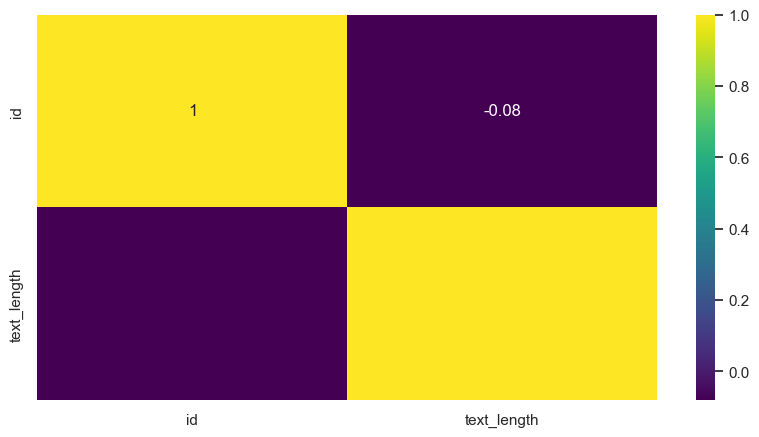

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns

plt.figure(figsize=(10, 5))

# Calculate correlation matrix for numeric columns
corr = numeric_data.corr()

# Create a heatmap with annotations and a different color map
sns.heatmap(corr, annot=True, cmap='viridis')  # You can change 'viridis' to another color map

# Show the plot
plt.show()

In [86]:
import pandas as pd

# Compute the correlation matrix
correlation_matrix = data[['text_length', 'label']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             text_length
text_length          1.0


### A word cloud from the cleaned text data in a DataFrame 

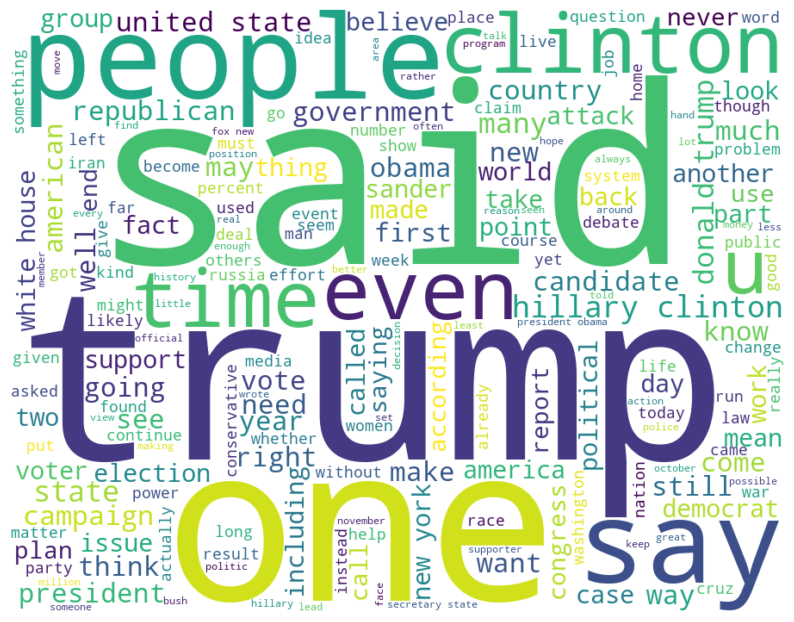

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all the cleaned text into a single string
combined_text = " ".join(data['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(background_color="white", width=900, height=700).generate(combined_text)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Word cloud for "label" is "Real"

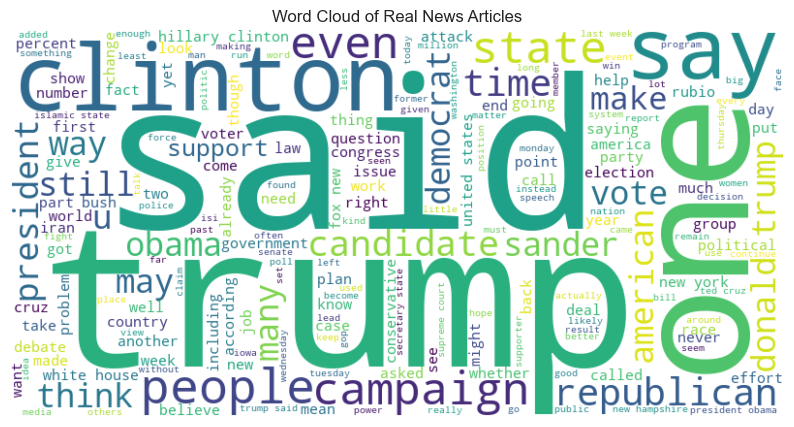

In [94]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the rows where the label is "REAL"
recommended_reviews = data[data['label'] == 'REAL']

# Concatenate all the cleaned text into a single text
all_reviews_text = ' '.join(recommended_reviews['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Real News Articles')
plt.show()


### Word cloud for "label" is "Fake"

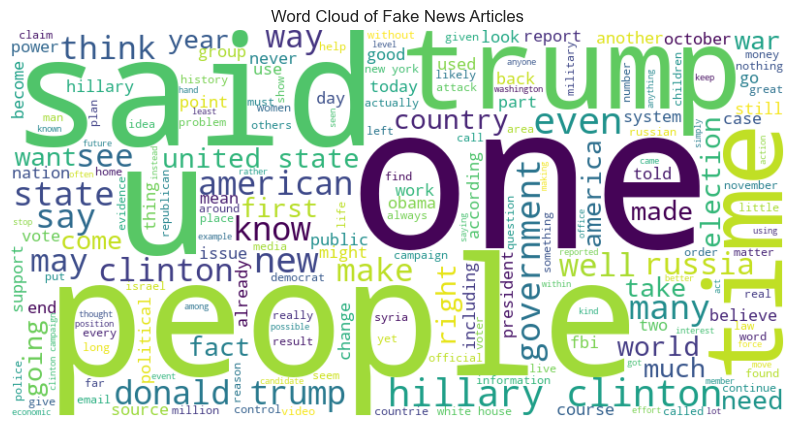

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to include only the rows where the label is "FAKE"
fake_news_reviews = data[data['label'] == 'FAKE']

# Concatenate all the cleaned text into a single text
all_reviews_text = ' '.join(fake_news_reviews['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Fake News Articles')
plt.show()


## Accuracy score graph with val_accuracy plot

Accuracy is one of the simplest metrics to understand and interpret. It is often used in testing machine learning classification algorithms. The Accuracy score is calculated as follows. The model is considered successful if the Accuracy score is between 0 and 1, with scores approaching 1

#### Validation section is selected from train dataset. The algorithm is determined by choosing the right model on the Train data set. In the validation section, the applied model is tried to be improved. For this, hyperparametric (hyperparameter tuning) applications are tried to find the most optimum coefficients/weights. Especially on very large data sets, it is defined as validation by taking a small part because it cannot be worked on continuously on Train data.

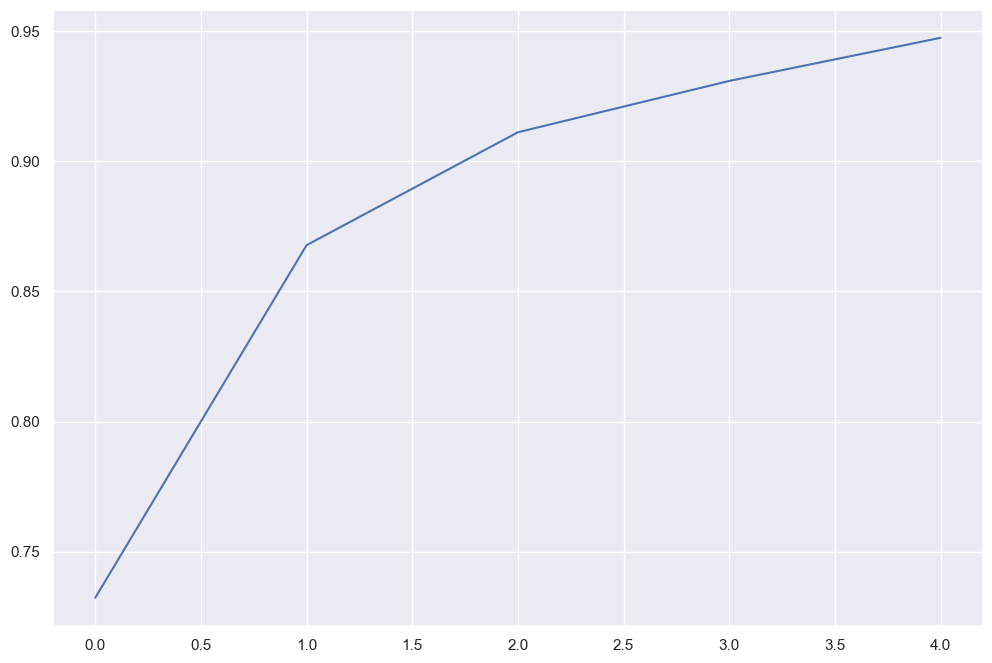

In [96]:
plt.plot(history.history["accuracy"],label="acc")

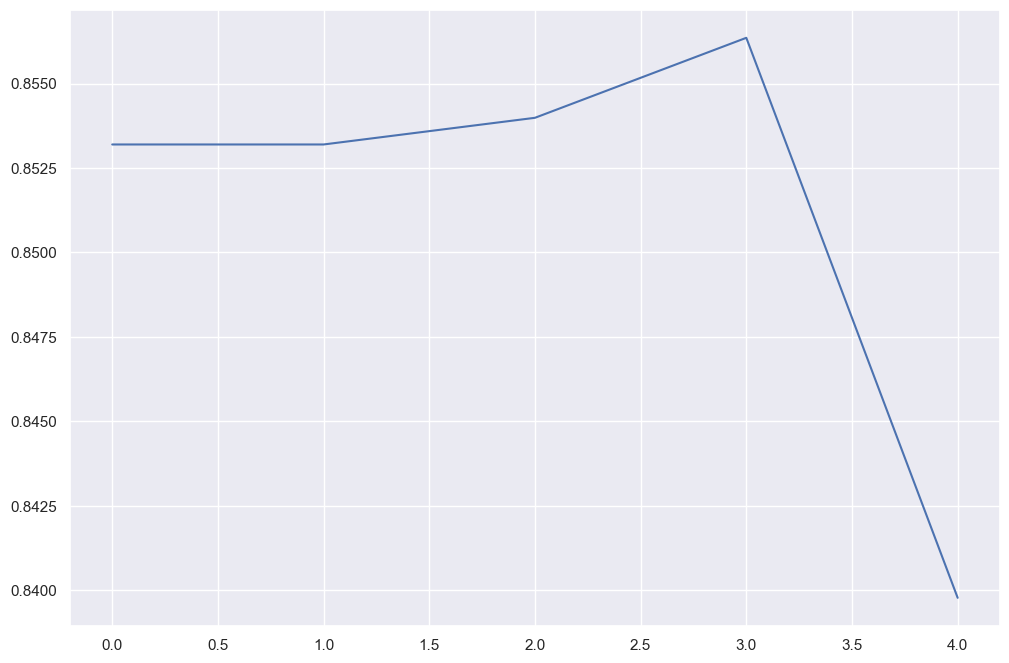

In [97]:
plt.plot(history.history["val_accuracy"],label="vall_acc")

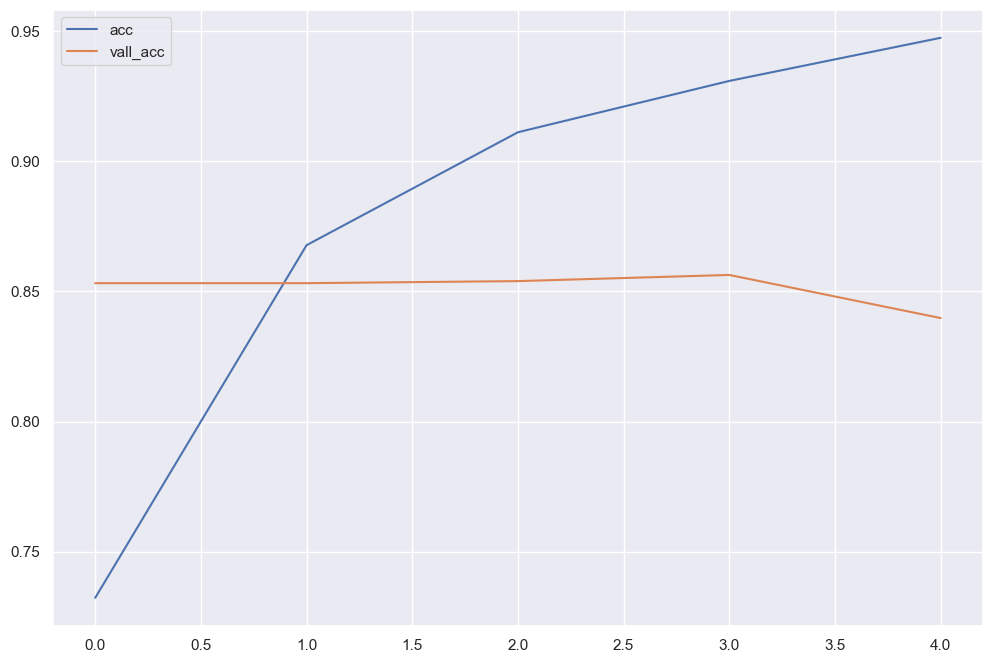

<Figure size 1200x800 with 0 Axes>

In [98]:
plt.plot(history.history["accuracy"],label="acc")
plt.plot(history.history["val_accuracy"],label="vall_acc")
plt.legend()
plt.show()
plt.savefig("Accuracy plot.png")

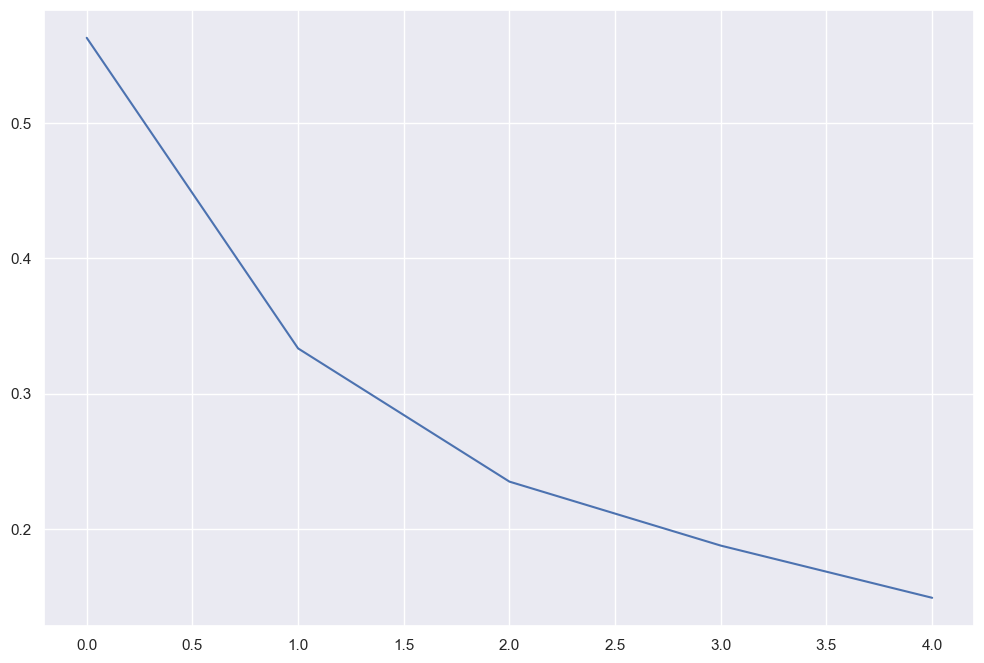

In [99]:
plt.plot(history.history["loss"],label="loss")

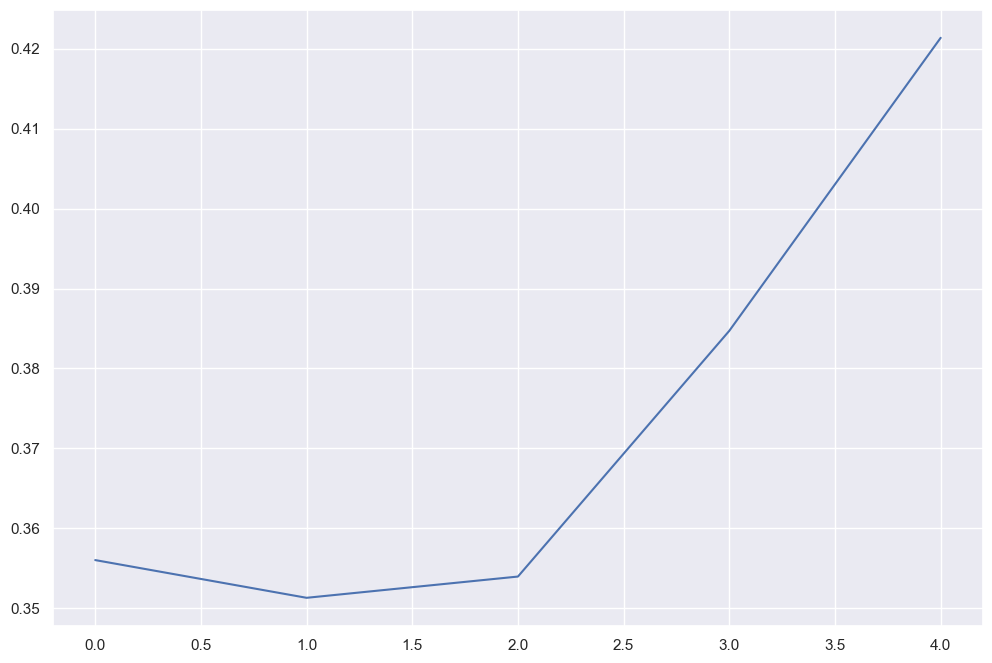

In [101]:
plt.plot(history.history["val_loss"],label="vall_loss")

## Creating Sentiment Analysis Model

#### We build a function model that takes a text as input and outputs the predictive tag (in short, we make it run fast under a function)

In [103]:
def predict_sentiment(reviews):
    tw=tokenizer.texts_to_sequences([reviews])
    tw=pad_sequences(tw,maxlen=200)
    prediction=int(model.predict(tw).round().item())
    print("Predict Label:",sentiment_label[1][prediction])

### Below are the examples to test the given sentence is real or fake

In [108]:
# Example usage with a news article sentence
test_sentence = "The government has announced new measures to tackle climate change, aiming for net-zero emissions by 2050."
prediction = predict_sentiment(test_sentence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predict Label: REAL


In [109]:
# Another example usage with a different news article sentence
test_sentence2 = "Scientists have discovered a new species of butterfly in the Amazon rainforest."
prediction2 = predict_sentiment(test_sentence2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predict Label: FAKE


In [110]:
# Another example usage with another different news article sentence
test_sentence3 = "A new study shows that drinking coffee can reduce the risk of heart disease."
prediction3 = predict_sentiment(test_sentence3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predict Label: FAKE


In [112]:
# Another example usage with a different news article sentence
test_sentence4 = "The local community held a successful fundraising event to support the new community center."
prediction4 = predict_sentiment(test_sentence4)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predict Label: REAL


### Conclusion:
In this project, we developed an LSTM-based deep learning model to classify news articles as fake or real. We began with a comprehensive data exploration and preprocessing phase, including text length distribution analysis, sentiment analysis using VADER, named entity recognition with spaCy, and text lemmatization. Visualizations such as word clouds and correlation heatmaps provided insights into the dataset.

Our LSTM model, built using Keras, utilized embedding layers to convert words into dense vectors and LSTM layers to capture temporal dependencies in the text. The model was trained and validated on preprocessed text data, demonstrating the capability to effectively classify news articles with high accuracy.

The results highlight the power of LSTM networks in handling sequential data for text classification tasks. The project also emphasizes the importance of thorough data preprocessing and visualization in understanding and preparing the dataset for model training. Future improvements could include experimenting with different model architectures, tuning hyperparameters, and incorporating additional features to further enhance classification performance.